In [4]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
!curl https://course.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   321  100   321    0     0    400      0 --:--:-- --:--:-- --:--:--   399
Updating fastai...
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
tensorflow 1.13.1 has requirement tensorboard<1.14.0,>=1.13.0, but you'll have tensorboard 1.12.2 which is incompatible.
pymc3 3.6 has requirement joblib<0.13.0, but you'll have joblib 0.13.2 which is incompatible.
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
Done.


In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
from fastai.vision import *
#from fastai.metrics import error_rate
from fastai import *
#from pathlib import Path

ModuleNotFoundError: No module named 'fastai.vision'

In [4]:
#path = Path('data/ships')

folders = ['barge', 'bulker', 'coast_guard', 'container', 'fishing_vessel',
           'icebreaker', 'livestock_carrier', 'military', 'offshore_vessel'
           'passenger', 'pilot_boat', 'research_vessel', 'roro', 'sailboat',
           'tanker', 'tug', 'vehicle_carrier']

files = ['Barges', 'Bulkers', 'Coast', 'Containerships', 'Fishing',
         'Icebreakers', 'Livestock', 'Military', 'Offshore'
         'Passenger', 'Pilot', 'Research',
         'RORO', 'Sailing', 'Tankers', 'Tugs', 'Vehicle']

In [5]:
files.index('Barges')

0

In [0]:
path.mkdir(parents=True, exist_ok=True)

In [11]:
for folder in folders:
  print('Downloading', folder)
  dest = path/folder
  dest.mkdir(parents=True, exist_ok=True)
  file = files[folders.index(folder)] + '.txt'
  download_images(path/file, dest, max_pics=10000)

In [12]:
!cd data/ships/; ls

bulker		     fishing_vessel		offshore
bulker_out.txt	     fishing_vessel_out.txt	offshore_out.txt
coast_guard	     icebreaker			ropax
coast_guard_out.txt  icebreaker_out.txt		ropax_out.txt
container	     livestock_carrier		tanker
container_out.txt    livestock_carrier_out.txt	tanker_out.txt
cruise		     motoryacht			tug_boat
cruise_out.txt	     motoryacht_out.txt		tug_boat_out.txt


In [13]:
for c in folders:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

tug_boat


ropax


tanker


offshore


motoryacht


cannot identify image file <_io.BufferedReader name='data/ships/motoryacht/00000023.jpg'>
livestock_carrier


icebreaker


fishing_vessel


cruise


container


coast_guard


bulker


In [0]:
import numpy as np
np.random.seed(6)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=4)

In [15]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5529 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
tug_boat,tug_boat,tug_boat,tug_boat,tug_boat
Path: data/ships;

Valid: LabelList (1382 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
coast_guard,offshore,cruise,livestock_carrier,offshore
Path: data/ships;

Test: None

In [16]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['bulker',
  'coast_guard',
  'container',
  'cruise',
  'fishing_vessel',
  'icebreaker',
  'livestock_carrier',
  'motoryacht',
  'offshore',
  'ropax',
  'tanker',
  'tug_boat'],
 12,
 5529,
 1382)

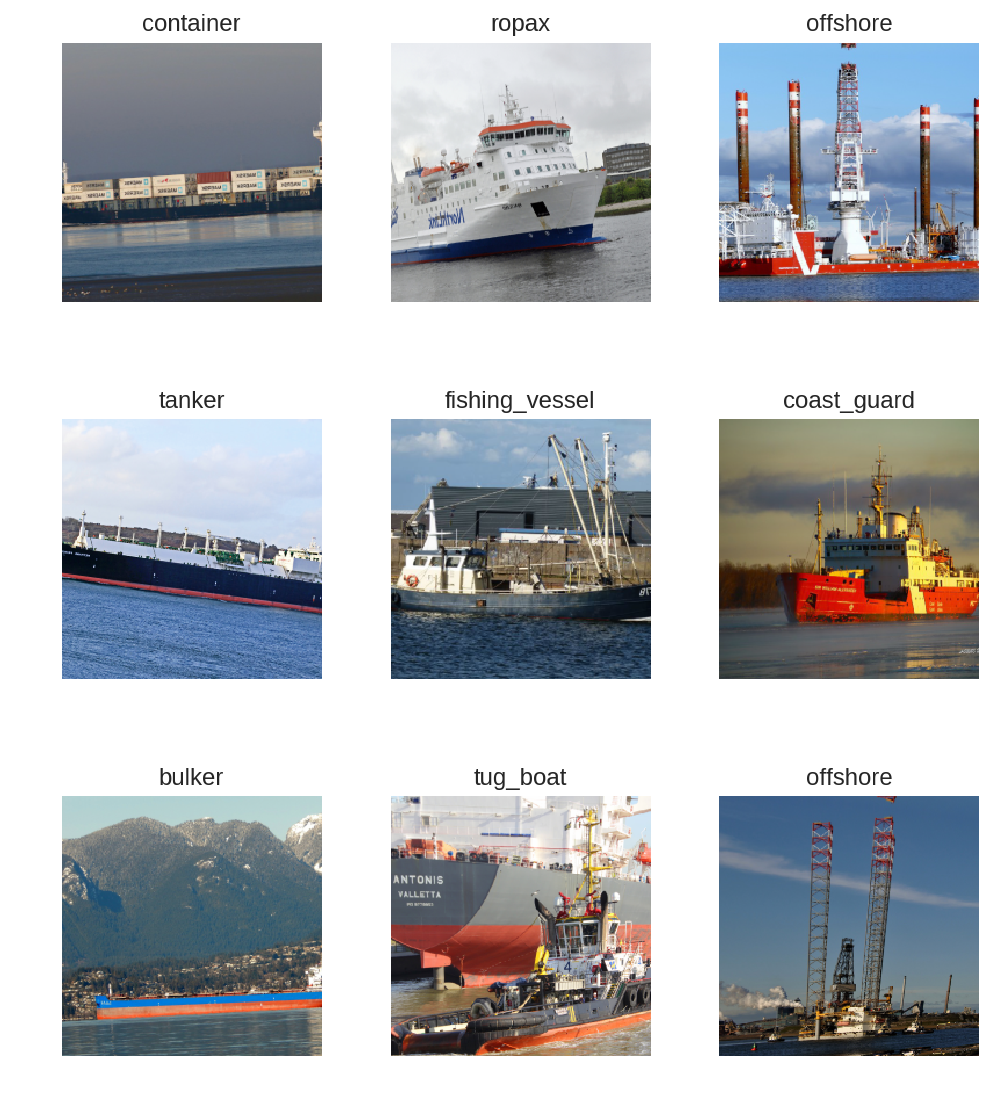

In [17]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
bs = 64

In [20]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
102502400it [00:01, 98713457.14it/s]


In [21]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
1,1.667848,1.086879,0.339363,04:10
2,1.209242,0.876147,0.288712,04:06
3,0.969918,0.787654,0.266281,04:07
4,0.816943,0.698461,0.232272,04:05
5,0.679895,0.636742,0.211288,04:06
6,0.613736,0.594441,0.203329,04:07
7,0.512007,0.564012,0.186686,04:06
8,0.437714,0.543729,0.181621,04:06
9,0.388959,0.533683,0.173661,04:06
10,0.367770,0.525188,0.172214,04:05


In [0]:
learn.save('resnet50_ship_classifier')

In [22]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

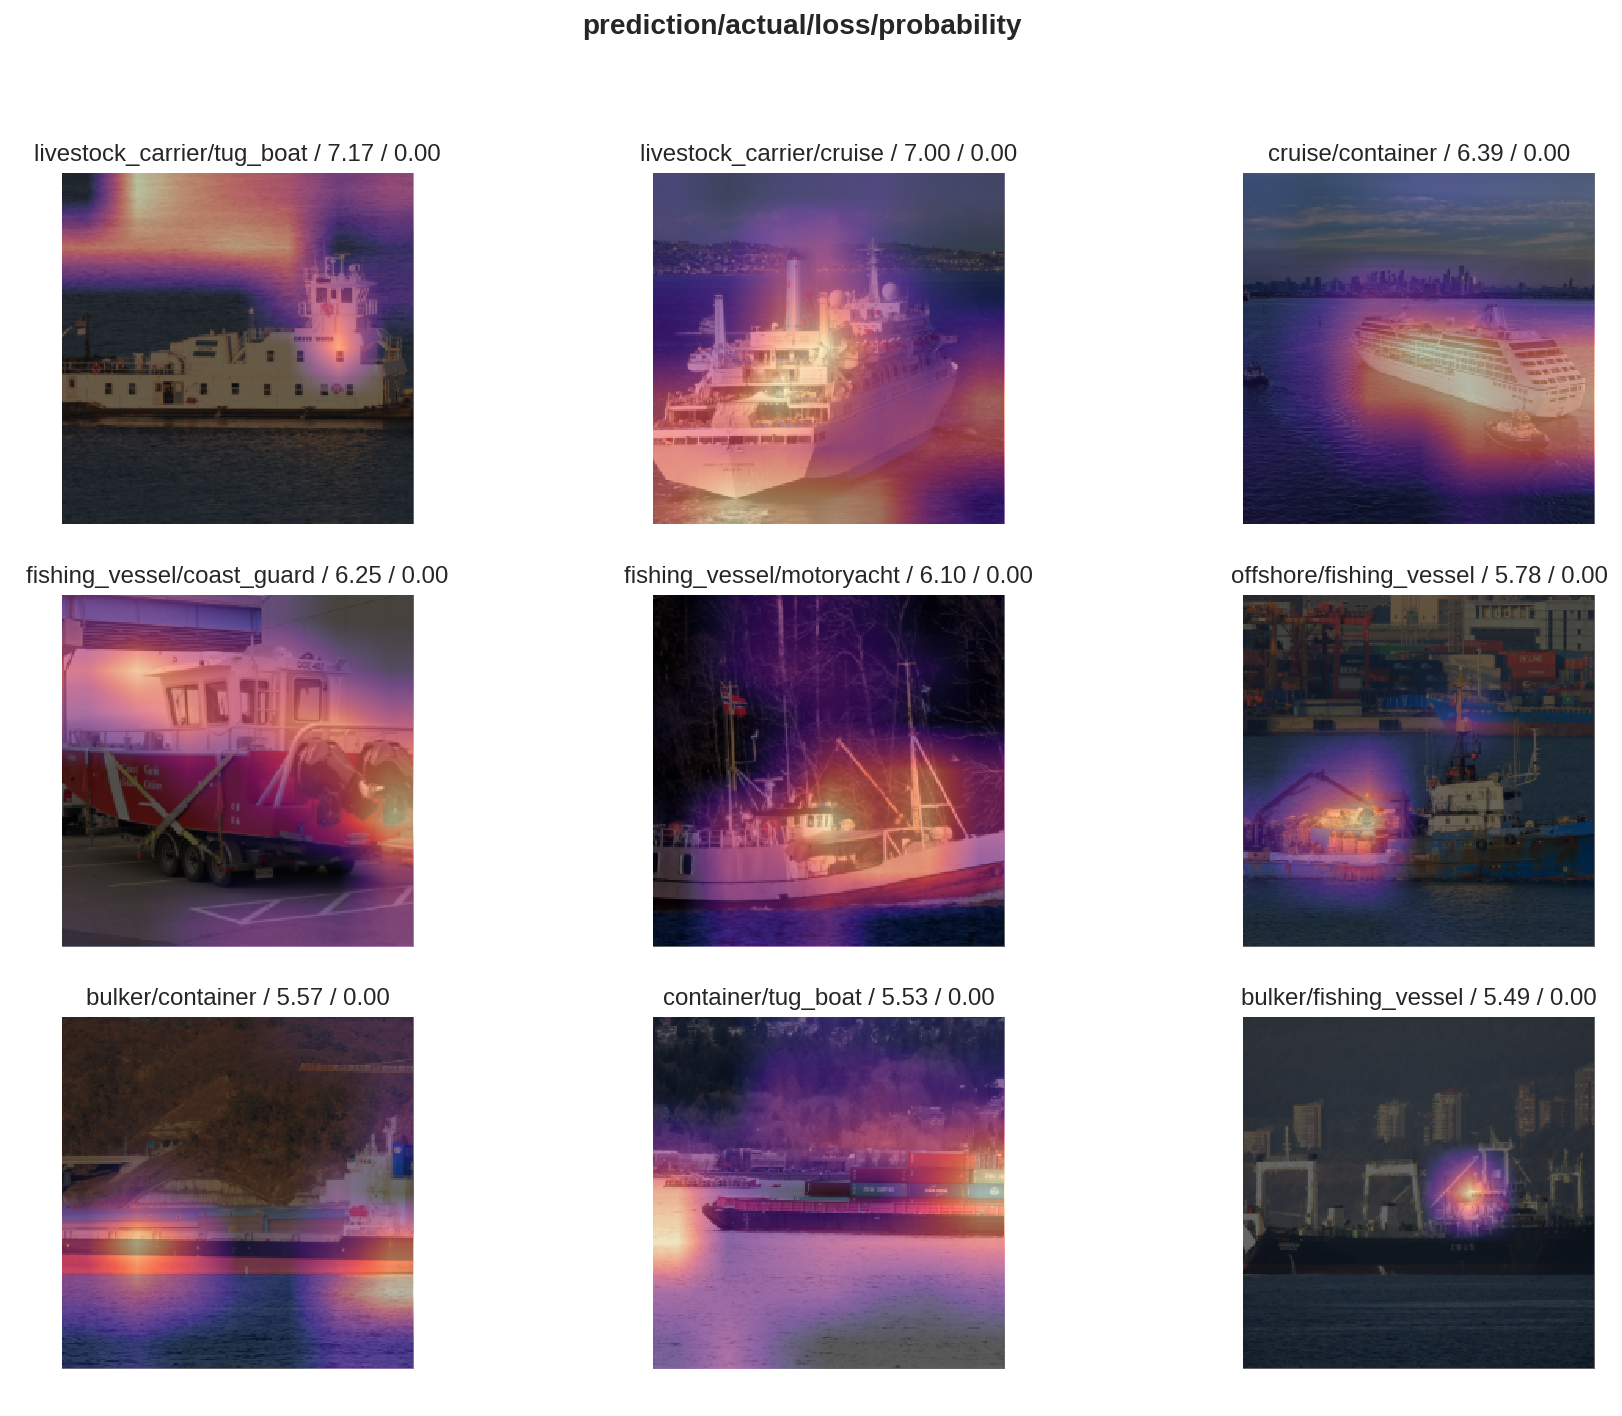

In [23]:
interp.plot_top_losses(9, figsize=(15,11))

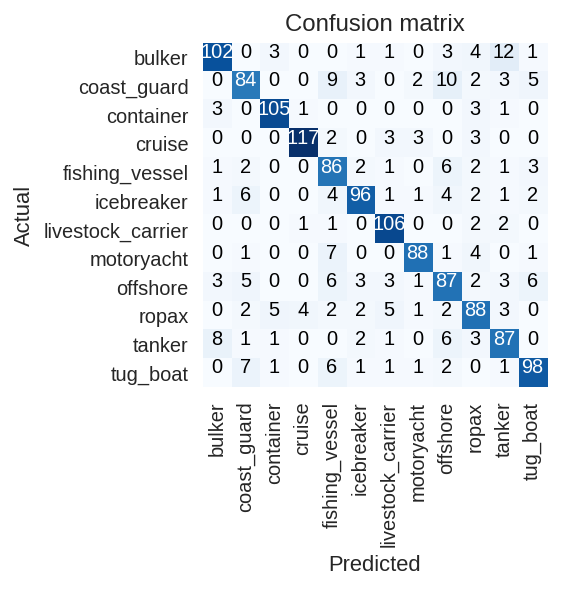

In [24]:
interp.plot_confusion_matrix()

In [0]:
from fastai.widgets import *

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

In [0]:
path = ds.x.path
ImageCleaner(ds, idxs, path)

In [0]:
learn.unfreeze()

In [34]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


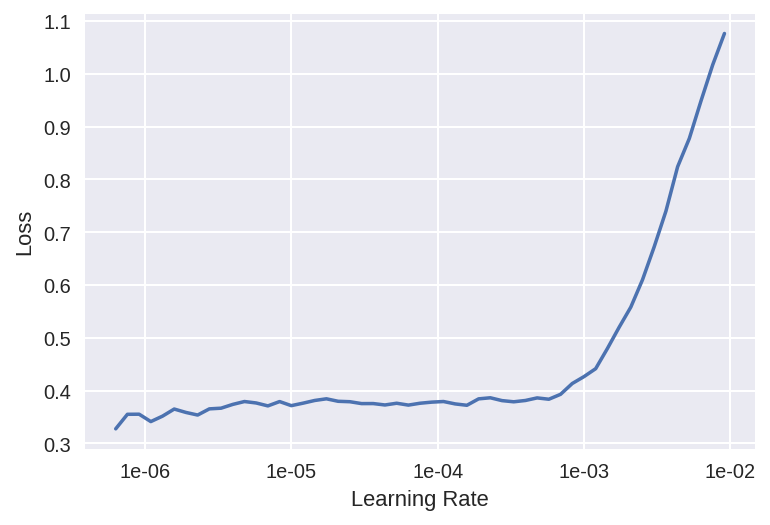

In [35]:
learn.recorder.plot()

In [37]:
learn.fit_one_cycle(5, max_lr=5e-4)

epoch,train_loss,valid_loss,error_rate,time
1,1.317615,1.041711,0.346599,04:08
2,0.972109,0.817858,0.282200,04:09
3,0.738350,0.684639,0.226483,04:09
4,0.561655,0.524985,0.162808,04:09
5,0.436245,0.464449,0.149783,04:08


In [0]:
!git remote add origin https://github.com/araskavakli/fast.ai.git
!git push -u origin master

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [0]:
!rm -r /content/data/ships/*

In [0]:
!zip -r /content/data/file.zip /content/data/ships

  adding: content/data/ships/ (stored 0%)
  adding: content/data/ships/ferry_out.txt (deflated 91%)
  adding: content/data/ships/gas_tanker/ (stored 0%)
  adding: content/data/ships/gas_tanker/00000104.jpg (deflated 13%)
  adding: content/data/ships/gas_tanker/00000326.jpg (deflated 18%)
  adding: content/data/ships/gas_tanker/00000054.jpg (deflated 4%)
  adding: content/data/ships/gas_tanker/00000329.jpg (deflated 4%)
  adding: content/data/ships/gas_tanker/00000064.jpg (deflated 1%)
  adding: content/data/ships/gas_tanker/00000059.jpg (deflated 1%)
  adding: content/data/ships/gas_tanker/00000491.jpg (deflated 8%)
  adding: content/data/ships/gas_tanker/00000495.jpg (deflated 4%)
  adding: content/data/ships/gas_tanker/00000294.jpg (deflated 3%)
  adding: content/data/ships/gas_tanker/00000029.jpg (deflated 1%)
  adding: content/data/ships/gas_tanker/00000410.jpg (deflated 3%)
  adding: content/data/ships/gas_tanker/00000072.jpg (deflated 8%)
  adding: content/data/ships/gas_tanker/0

In [0]:
from google.colab import files
files.download('/content/data/file.zip')

MessageError: ignored